In [ ]:
# What king of case study it is?
# More than 20 features: 
# Output column: labels as 0 and 1. 0: The person is non defaulter and 1 says person is defaulter
# summary: 0: Non-defaulter
#          1: Defaulter
# Berkshire Hathway: We increased the profit by 2%
# We decreased defaulters by 40%

In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [ ]:
data = pd.read_csv('/Users/bhupendrakumar/Documents/Personal/Data Einstein Assignments/Anonymize_Loan_Default_data.csv')



In [2]:
data = pd.read_csv('/Users/bhupendrakumar/Documents/Personal/Data Einstein Assignments/Anonymize_Loan_Default_data.csv',encoding='latin1')


In [35]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,...,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,repay_fail
0,0.0,0.0,0.0,36.0,0.00,0.00,1.0,4,0.0,0,...,0.0,1.0,0.000000,0.00,0.00,0.00,2007-01-01,0.00,Jan-07,1
1,2500.0,2500.0,2500.0,36.0,13.98,85.42,4.0,4,20004.0,0,...,21.3,10.0,3075.291779,3075.29,2500.00,575.29,2013-07-01,90.85,Jun-16,0
2,5000.0,5000.0,5000.0,36.0,15.95,175.67,4.0,4,59000.0,0,...,99.9,15.0,2948.760000,2948.76,1909.02,873.81,2011-11-01,175.67,Mar-12,1
3,7000.0,7000.0,7000.0,36.0,9.91,225.58,10.0,0,53796.0,0,...,47.2,20.0,8082.391880,8082.39,7000.00,1082.39,2014-03-01,1550.27,Mar-14,0
4,2000.0,2000.0,2000.0,36.0,5.42,60.32,10.0,4,30000.0,0,...,0.0,15.0,2161.663244,2161.66,2000.00,161.66,2014-02-01,53.12,Jun-16,0


In [ ]:
# Observations: It's a classification problem statement
# Pre-processing: We need to remove Unnamed: 0 column
# pre-process the term, emp_length.

In [ ]:
# data = pd.read_csv('/Users/bhupendrakumar/Documents/Personal/Data Einstein Assignments/Anonymize_Loan_Default_data.csv',
#                    encoding='latin1', index_col=0)

In [4]:
data.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'repay_fail'],
      dtype='object')

In [5]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
data.head()

In [ ]:
data.shape
# Observations: We have 35 independent variables and 1 dependent variable(Output variable)(repay_fail)

In [ ]:
data.head()

In [ ]:
# Checking the data type of the variables

In [ ]:
data['loan_status']

In [ ]:
data.dtypes

In [ ]:
data['repay_fail'].value_counts()

In [ ]:
# Observation: The dataset is imbalanced


In [ ]:
data.duplicated()

In [ ]:
data.duplicated().sum()

In [ ]:
duplicate = data[data.duplicated(subset=['member_id'])]
 
print("Duplicate Rows :")

In [ ]:
duplicate

In [ ]:
#data.drop_duplicates(subset='member_id', keep='first', inplace=True)

# Null Value Analysis

In [ ]:
data.isnull().sum()

In [6]:
# Drop the columns: mths_since_last_delinq,next_pymnt_d
data.drop(["mths_since_last_delinq","next_pymnt_d"],axis=1,inplace=True)

In [ ]:
data.isnull().sum()

In [7]:
# dropping all the null values
data.dropna(inplace=True)

In [8]:
data.isnull().sum()

id                     0
member_id              0
loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
zip_code               0
addr_state             0
dti                    0
delinq_2yrs            0
earliest_cr_line       0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_bal              0
revol_util             0
total_acc              0
total_pymnt            0
total_pymnt_inv        0
total_rec_prncp        0
total_rec_int          0
last_pymnt_d           0
last_pymnt_amnt        0
last_credit_pull_d     0
repay_fail             0
dtype: int64

In [ ]:
(38480-data.shape[0])/38480

In [ ]:
" %1234% ".strip()

In [ ]:
data['revol_util']

In [ ]:
data.shape

In [9]:
for index in range(38480):
    try:
        data['revol_util'][index] = data['revol_util'][index].replace("\x93","").replace('\x94',"").strip("%")
    except Exception as e:
        continue

<ipython-input-9-8e969e46fd0c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['revol_util'][index] = data['revol_util'][index].replace("\x93","").replace('\x94',"").strip("%")


In [ ]:
data

In [ ]:
data.dtypes

In [ ]:
data['revol_util'].str.strip('%').astype(float)

In [10]:
# Convert percentage strings to numerical values
data['revol_util'] = data['revol_util'].str.strip('%').astype(float)

In [ ]:
data['revol_util'].dtype

In [ ]:
data

In [ ]:
data['revol_util'].str.strip('%').astype('float')

In [ ]:
# data['revol_util'].str.extract('(\d+)')

In [ ]:
data['emp_length']

In [ ]:
data['emp_length'].str.extract('(\d+)').astype(float)

In [11]:
data['emp_length'] = data['emp_length'].str.extract('(\d+)').astype(float)
data['term'] = data['term'].str.extract('(\d+)').astype(float)

In [ ]:
data

In [ ]:
data['zip_code']

In [ ]:
data.dtypes

In [ ]:
data['issue_d']

In [12]:
data['issue_d'] = pd.to_datetime(data['issue_d'], format='%b-%y')
data['last_pymnt_d'] = pd.to_datetime(data['last_pymnt_d'], format='%b-%y')

In [ ]:
data['issue_d']

In [ ]:
data.dtypes

In [ ]:
# Encoding the columns

In [13]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [14]:
label_encoder = LabelEncoder()
categorical_cols = ['home_ownership', 'verification_status', 'purpose', 'addr_state']


In [15]:
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [ ]:
data

In [ ]:
data.describe()

In [ ]:
# Observation:
# Outliers are present in many columns i.e. int_rate, installment, pub_rec, ... 
# We have 28 numeric data type columns
# Drop id and member_id

In [16]:
# Dropping id and memeber_id
data.drop(['id','member_id'],axis=1,inplace=True)

In [ ]:
data.shape

In [ ]:
data

In [ ]:
# output column= repay_fail
# 1: Defaulter
# 0: Non-Defaulter

In [17]:
data['repay_fail'].value_counts()

0    31834
1     5525
Name: repay_fail, dtype: int64

# EDA (Exploratory Data Analysis)

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# We use scatter plot amongst two continuous variables
# Bi-variate analysis
sns.set_style('whitegrid')
sns.scatterplot(x='int_rate',y='annual_inc',hue='repay_fail',data=data)

In [ ]:
# Univariate analysis:
# When we try to study single variable at a time.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
sns.distplot(data['funded_amnt_inv']);

In [ ]:
# Observation: It's a right skewed distribution
# outliers are present

In [ ]:
# If I want to compare two categorical variables
# One of the categorical variable is our output feature.
sns.countplot(x='home_ownership',hue='repay_fail',data=data)

In [ ]:
data['home_ownership'].value_counts()

In [ ]:
data.shape

In [ ]:
# Outlier analysis

In [ ]:
# Handled outliers using z-score
# We will use box-plot method

In [ ]:
sns.boxplot(data=data['funded_amnt_inv']);

In [ ]:
sns.boxplot(data=data['funded_amnt_inv'],whis=2.5);

In [17]:
# IQR = q75 - q25
# upperLimit = q75 + 2*IQR
# lowerLimit = q25 - 2*IQR
import numpy as np

In [22]:
q25,q75=np.percentile(data['funded_amnt_inv'],[25,75])
print(q25,q75)

4975.0 14150.0


In [ ]:
q25,q75=np.percentile(data['funded_amnt_inv'],[25,75])
q25, q75 = 4975.0, 14150.0
IQR = q75-q25

upperLimit = q75 + 2*IQR
lowerLimit = q25 - 2*IQR

In [ ]:
print(upperLimit,lowerLimit)

In [ ]:
new_data=data[data['funded_amnt_inv']<=32500]

In [ ]:
new_data

<ipython-input-35-2b91a9456ef8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMat=data.corr()


<Axes: >

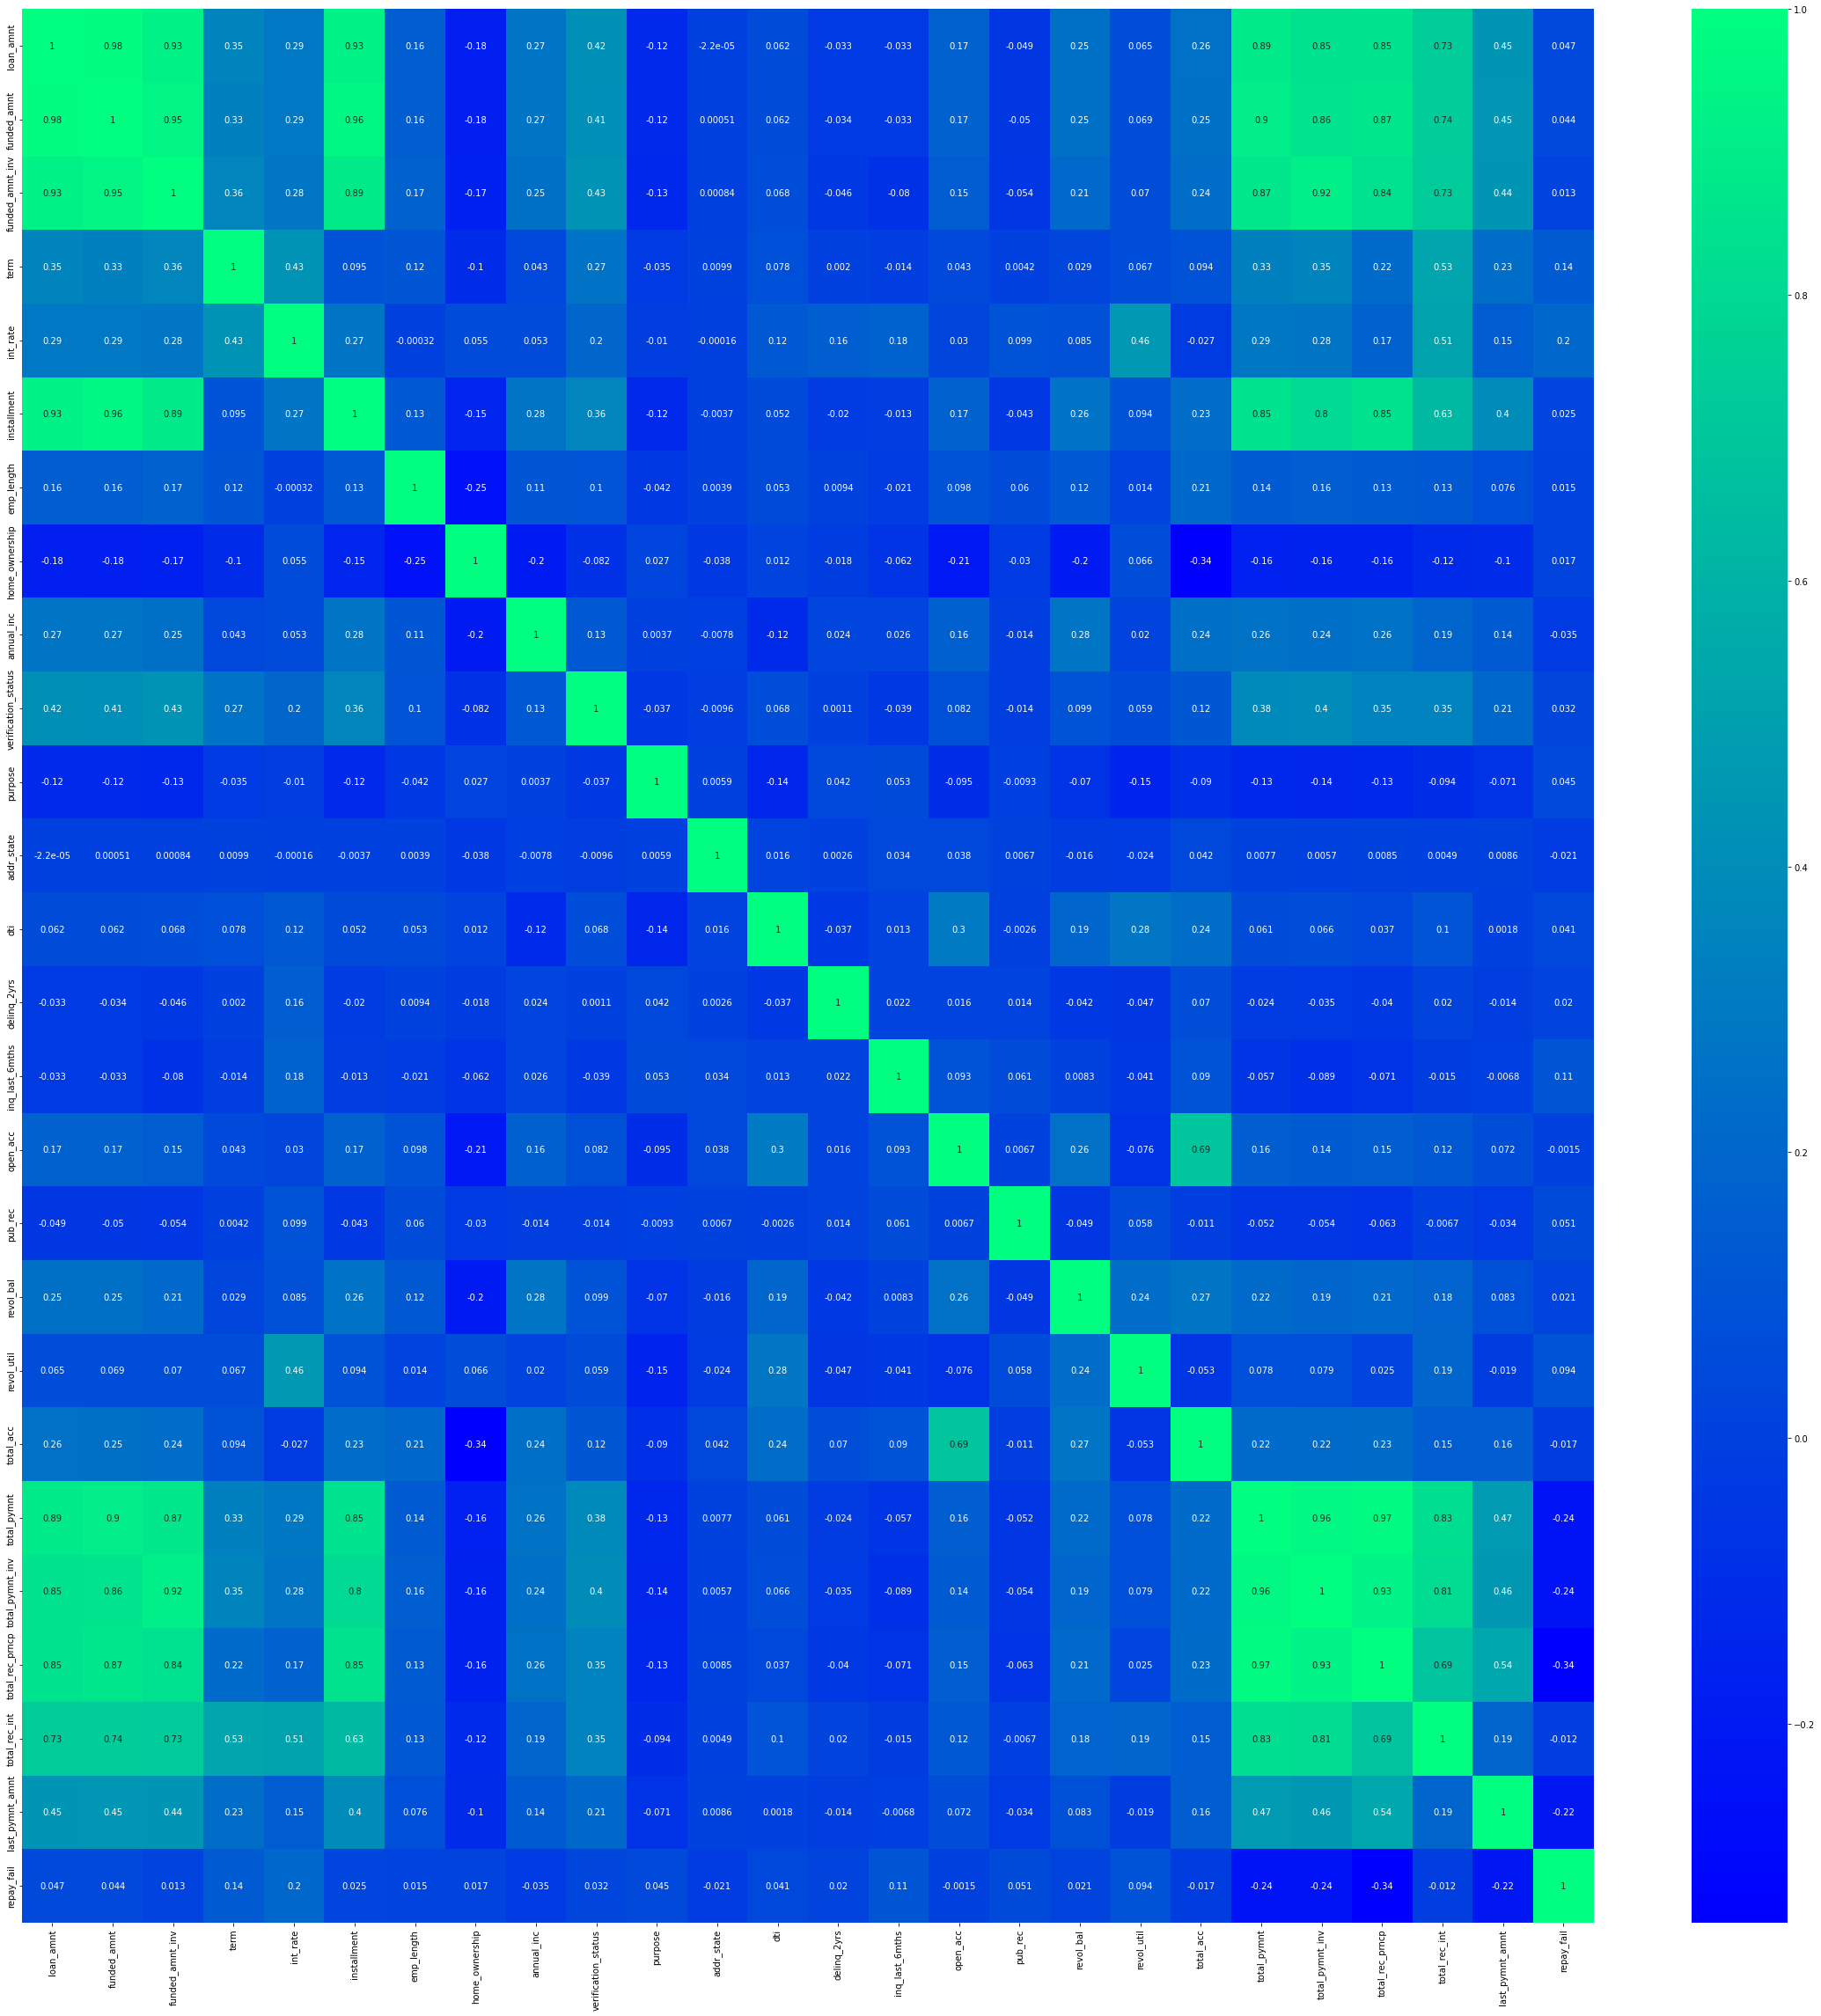

In [35]:
corrMat=data.corr()
plt.figure(figsize=(40,40))
sns.heatmap(corrMat,annot=True,cmap="winter")

In [36]:
# Observations:
# loan_amnt: total_rec__int, total_rec__prncpl, total_payment_inv,total_payment
# We will remove the loan_amt
# Remove funded_amnt, funded_amnt_inv,installment, total_pymnt,total_payment_inv
# 

## We will get back

In [37]:
# Interpretation

In [18]:
# Import all the supporting libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [19]:
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'repay_fail'],
      dtype='object')

In [45]:
data['earliest_cr_line']

0        Jan-01
1        Aug-05
2        Apr-94
3        Mar-98
4        Jan-75
          ...  
38475    Jan-00
38476    Apr-99
38477    Dec-95
38478    Jul-07
38479    Oct-95
Name: earliest_cr_line, Length: 37359, dtype: object

In [ ]:
# Encoding, featurization

In [20]:
X = data.drop(['loan_status','issue_d','last_pymnt_d','last_credit_pull_d','zip_code','earliest_cr_line','repay_fail'],axis=1)
Y=data['repay_fail']


In [21]:
print(X.shape,Y.shape)

(37359, 25) (37359,)


In [23]:
# Split the data into train and test
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=43)


In [24]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(29887, 25) (7472, 25) (29887,) (7472,)


In [25]:
model=RandomForestClassifier()

In [26]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [27]:
pred = model.predict(x_test)


In [28]:
pred

array([0, 0, 1, ..., 0, 0, 0])

In [29]:
y_test

16562    0
17367    0
35599    1
35689    0
7866     0
        ..
6971     0
31942    0
4587     0
21749    0
10922    0
Name: repay_fail, Length: 7472, dtype: int64

In [30]:
accuracy=accuracy_score(pred,y_test)

In [31]:
accuracy

0.9876873661670236

In [32]:
class_report=classification_report(y_test,pred)

In [33]:
print(class_report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6343
           1       1.00      0.92      0.96      1129

    accuracy                           0.99      7472
   macro avg       0.99      0.96      0.98      7472
weighted avg       0.99      0.99      0.99      7472



In [36]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [37]:
y_pred_prob=model.predict_proba(x_test)[:,1]
fpr,tpr,thresh=roc_curve(y_test,y_pred_prob)
print("False positive rate : ",fpr)
print("True positive rate : ",tpr)
print("Thresholds : ",thresh)

False positive rate :  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.57654107e-04 1.57654107e-04 3.15308214e-04 3.15308214e-04
 4.72962321e-04 4.72962321e-04 6.30616428e-04 6.30616428e-04
 6.30616428e-04 7.88270534e-04 7.88270534e-04 1.10357875e-03
 1.10357875e-03 1.57654107e-03 2.20715750e-03 2.99542803e-03
 3.62604446e-03 3.94135267e-03 4.41431499e-03 4.88727731e-03
 

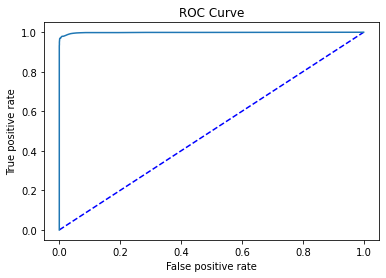

In [53]:
plt.plot([0,1],[0,1],'b--')
plt.plot(fpr,tpr,label='Random Forrest Classifier')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC Curve")
plt.show()

In [55]:
roc_auc_score(y_test,y_pred_prob)

0.9984370040580921

In [38]:
from sklearn.linear_model import LogisticRegression

In [57]:
lrModel=LogisticRegression()

In [58]:
lrModel.fit(x_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
pred = lrModel.predict(x_test)
accuracy=accuracy_score(pred,y_test)
print(accuracy)

0.99156852248394


In [60]:
class_report=classification_report(y_test,pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6343
           1       0.99      0.96      0.97      1129

    accuracy                           0.99      7472
   macro avg       0.99      0.98      0.98      7472
weighted avg       0.99      0.99      0.99      7472



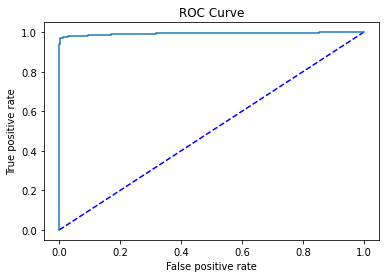

In [61]:
y_pred_prob=lrModel.predict_proba(x_test)[:,1]
fpr,tpr,thresh=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'b--')
plt.plot(fpr,tpr,label='Gradient Boosting Classifier')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC Curve")
plt.show()

In [39]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [63]:
pred = gnb.predict(x_test)
accuracy=accuracy_score(pred,y_test)
print(accuracy)

0.7315310492505354


In [64]:
class_report=classification_report(y_test,pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.97      0.71      0.82      6343
           1       0.35      0.88      0.50      1129

    accuracy                           0.73      7472
   macro avg       0.66      0.79      0.66      7472
weighted avg       0.88      0.73      0.77      7472



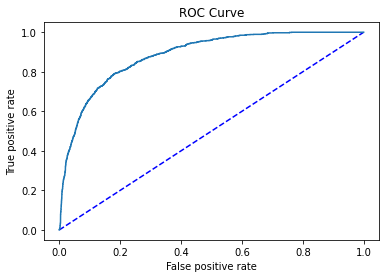

In [65]:
y_pred_prob=gnb.predict_proba(x_test)[:,1]
fpr,tpr,thresh=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'b--')
plt.plot(fpr,tpr,label='Gradient Boosting Classifier')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC Curve")
plt.show()

In [66]:
roc_auc_score(y_test,y_pred_prob)

0.8849550923184188

In [40]:
from sklearn.tree import DecisionTreeClassifier


In [41]:
dtc=DecisionTreeClassifier()

In [69]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [70]:
pred = dtc.predict(x_test)
accuracy=accuracy_score(pred,y_test)
print(accuracy)

0.986482869379015


In [71]:
class_report=classification_report(y_test,pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6343
           1       0.95      0.96      0.96      1129

    accuracy                           0.99      7472
   macro avg       0.97      0.97      0.97      7472
weighted avg       0.99      0.99      0.99      7472



In [85]:
models=[DecisionTreeClassifier(),RandomForestClassifier(),LogisticRegression(),GaussianNB()]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=43)
for model in models:
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    
    accuracy=accuracy_score(y_test,pred)
    
    print("Accuracy for model {} is {}".format(model,accuracy))

Accuracy for model DecisionTreeClassifier() is 0.987152034261242
Accuracy for model RandomForestClassifier() is 0.9883565310492506
Accuracy for model LogisticRegression() is 0.99156852248394
Accuracy for model GaussianNB() is 0.7315310492505354


In [83]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

In [87]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
seed = 45

dtc = DecisionTreeClassifier()

# criterion{“gini”, “entropy”, “log_loss”}
kfold = KFold(n_splits=3, shuffle=True, random_state=seed)

parameters = [{'criterion': ['gini','entropy','log_loss'], 'splitter': ['best','random'],'max_depth':[10,20,30,40,50,60,100,200,500,1000]}]


grid = GridSearchCV(estimator=dtc, param_grid=parameters, cv=kfold, scoring='accuracy')

grid.fit(X, Y)

GridSearchCV(cv=KFold(n_splits=3, random_state=45, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy', 'log_loss'],
                          'max_depth': [10, 20, 30, 40, 50, 60, 100, 200, 500,
                                        1000],
                          'splitter': ['best', 'random']}],
             scoring='accuracy')

In [88]:
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.9907652774431864
DecisionTreeClassifier(criterion='entropy', max_depth=500)
{'criterion': 'entropy', 'max_depth': 500, 'splitter': 'best'}


In [89]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

In [90]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [91]:
pred = gbc.predict(x_test)
accuracy_score(pred,y_test)

0.9860813704496788

In [57]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier

In [92]:
level0 = list()
level0.append(('lr', LogisticRegression()))
level0.append(('knn', KNeighborsClassifier()))
level0.append(('cart', DecisionTreeClassifier()))
level0.append(('svm', SVC()))
level0.append(('bayes', GaussianNB()))
# define meta learner model
level1 = LogisticRegression()
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)


In [93]:
model.fit(x_train,y_train)
pred=model.predict(x_test)
accuracy_score(pred,y_test)

0.9931745182012848

In [98]:
np.array(x_test.iloc[1]).reshape(-1,1)

array([[4.50000000e+03],
       [4.50000000e+03],
       [4.47500000e+03],
       [3.60000000e+01],
       [5.42000000e+00],
       [1.35720000e+02],
       [1.00000000e+01],
       [0.00000000e+00],
       [9.90000000e+04],
       [0.00000000e+00],
       [4.00000000e+00],
       [3.30000000e+01],
       [1.41500000e+01],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.20000000e+01],
       [0.00000000e+00],
       [1.71500000e+04],
       [5.36000000e+01],
       [3.70000000e+01],
       [4.85288965e+03],
       [4.82593000e+03],
       [4.50000000e+03],
       [3.52890000e+02],
       [1.47217000e+03]])

In [97]:
model.predict(np.array(x_test.iloc[1]))

ValueError: Expected 2D array, got 1D array instead:
array=[4.50000000e+03 4.50000000e+03 4.47500000e+03 3.60000000e+01
 5.42000000e+00 1.35720000e+02 1.00000000e+01 0.00000000e+00
 9.90000000e+04 0.00000000e+00 4.00000000e+00 3.30000000e+01
 1.41500000e+01 0.00000000e+00 0.00000000e+00 1.20000000e+01
 0.00000000e+00 1.71500000e+04 5.36000000e+01 3.70000000e+01
 4.85288965e+03 4.82593000e+03 4.50000000e+03 3.52890000e+02
 1.47217000e+03].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [99]:
pred=model.predict(np.array(x_test.iloc[1]).reshape(1,-1))

In [103]:
if pred[0]==0:
    print("Not a defaulter")
else:
    print("Defaulter")

Not a defaulter


In [101]:
y_test.iloc[1]

0